In [15]:
import pandahouse 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

connection = {
'host': 'https://clickhouse.lab.karpov.courses',
'password': 'dpo_python_2020',
'user': 'student',
'database': 'simulator_20220220'
}

sns.set(rc = {'figure.figsize':(15,10)})

In [2]:
# Task 1
q = '''
      Select 
          exp_group,
          user_id,
          countIf(user_id, action = 'like') as likes,
          countIf(user_id, action = 'view') as views,
          likes/views as CTR
      from simulator_20220220.feed_actions
      where toDate(time) >= '2022-02-06' and toDate(time) <= '2022-02-12' 
          and exp_group in (2,3)
      group by exp_group, user_id
     '''

df_AA = pandahouse.read_clickhouse(q, connection = connection)

In [3]:
p_values = []
for _ in range(10000):
  p_values.append(stats.ttest_ind(df_AA[df_AA.exp_group == 2].CTR.sample(500, replace = True), 
                  df_AA[df_AA.exp_group == 3].CTR.sample(500, replace = True),
                  equal_var = False)[1])

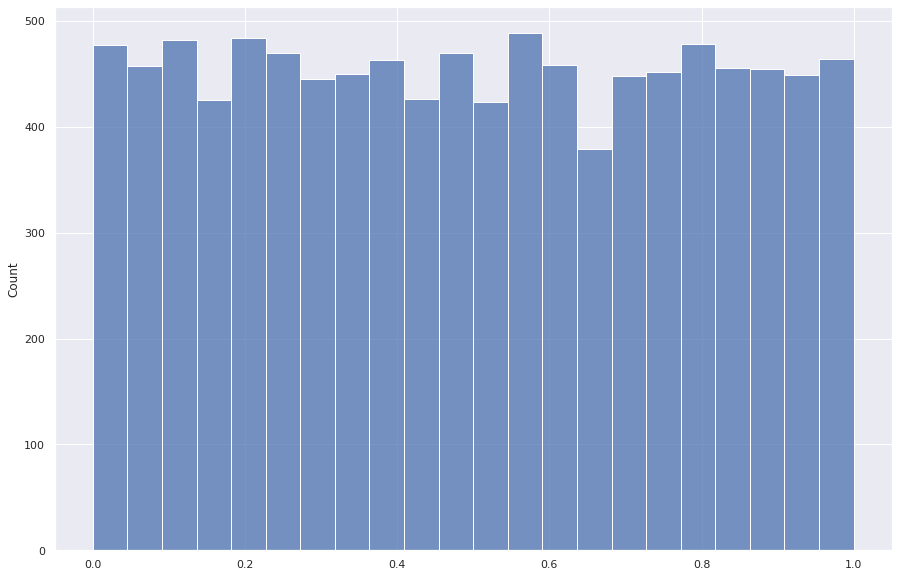

In [8]:

Pvalue_distibution= sns.histplot(p_values)

In [5]:
df_p_values = pd.DataFrame({'p_values':p_values})
procent_of_error = df_p_values[df_p_values.p_values <= 0.05].count()*100/df_p_values.count()

In [22]:
print('–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ p-value —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–∏–ª–æ—Å—å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –∏ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤ –∑–Ω–∞—á–µ–Ω–∏–µ –±–æ–ª—å—à–µ 0,05 - —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, \n—á—Ç–æ —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–∞—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ 2 –≥—Ä—É–ø–ø. \n–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ —á—Ç–æ p_value <= 0.05 —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {procent_of_error} %. \n–ê–ê —Ç–µ—Å—Ç –ø—Ä–æ—à–µ–ª —É—Å–ø–µ—à–Ω–æ, —Å–∏—Å—Ç–µ–º–∞ —Å–ø–ª–∏—Ç–æ–≤–∞–Ω–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ!'.format(procent_of_error=procent_of_error.to_list()[0]))

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ p-value —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–∏–ª–æ—Å—å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –∏ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤ –∑–Ω–∞—á–µ–Ω–∏–µ –±–æ–ª—å—à–µ 0,05 - —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, 
—á—Ç–æ —É –Ω–∞—Å –Ω–µ—Ç –æ—Å–Ω–æ–≤–∞–Ω–∏–π –æ—Ç–≤–µ—Ä–≥–∞—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ 2 –≥—Ä—É–ø–ø. 
–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ —á—Ç–æ p_value <= 0.05 —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 5.17 %. 
–ê–ê —Ç–µ—Å—Ç –ø—Ä–æ—à–µ–ª —É—Å–ø–µ—à–Ω–æ, —Å–∏—Å—Ç–µ–º–∞ —Å–ø–ª–∏—Ç–æ–≤–∞–Ω–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ!


In [ ]:
# Task 2

In [3]:
q = '''
      Select 
          exp_group,
          user_id,
          countIf(user_id, action = 'like') as likes,
          countIf(user_id, action = 'view') as views,
          likes/views as CTR
      from simulator_20220220.feed_actions
      where toDate(time) >= '2022-02-13' and toDate(time) <= '2022-02-19' 
          and exp_group in (1,2)
      group by exp_group, user_id
     '''

df_AB = pandahouse.read_clickhouse(q, connection = connection)

In [4]:
# ttest
stats.ttest_ind(df_AB[df_AB.exp_group == 1].CTR, 
                df_AB[df_AB.exp_group == 2].CTR,
                equal_var = False)

Ttest_indResult(statistic=0.7094392041270486, pvalue=0.4780623130874935)

In [5]:
''' –°—É–¥—è –ø–æ –¢-—Ç–µ—Å—Ç—É –≥—Ä—É–ø–ø—ã —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –Ω–µ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è. –í–µ—Ä–æ—è—Ç–Ω–æ –ø–æ—Ç–æ–º—É, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥—Ä—É–ø–ø –æ—á–µ–Ω—å –±–ª–∏–∑–∫–∏, 
    –∞ —Ç–∞–∫–∂–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≥—Ä—É–ø–ø—ã 2 —Å–ª–∏—à–∫–æ–º –¥–∞–ª–µ–∫–æ –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ (2 –ø–∏–∫–∞, –¥–ª–∏–Ω–Ω—ã–µ —Ö–≤–æ—Å—Ç—ã).'''
[df_AB[df_AB.exp_group == 1].CTR.mean(),df_AB[df_AB.exp_group == 2].CTR.mean()]

[0.21560459841296287, 0.21441927347479375]

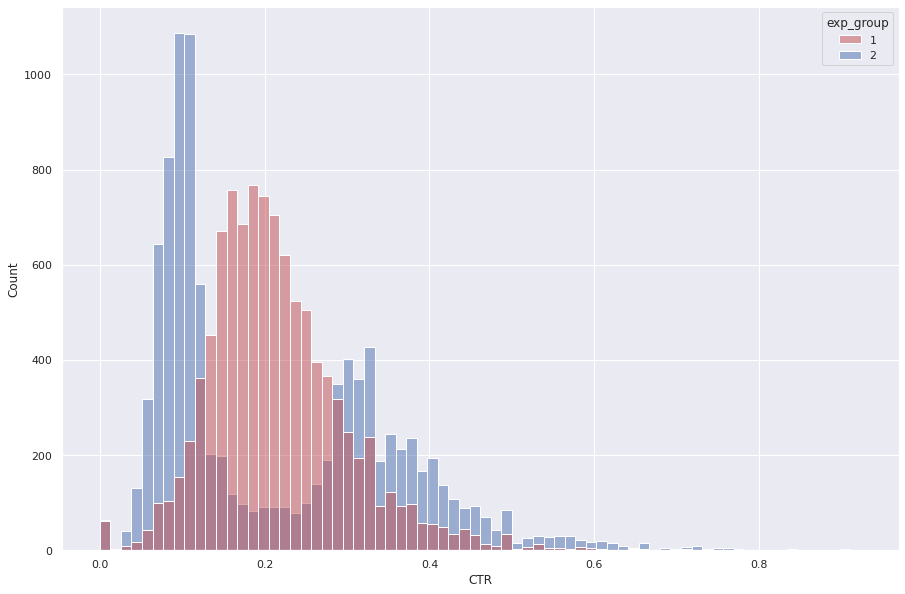

In [16]:
# visualisation
groups = sns.histplot(data = df_AB,
                        x='CTR',
                        hue='exp_group',
                        palette = ['r', 'b'],
                        kde=False)
# –û–¥–Ω–∞–∫–æ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –æ—á–µ–≤–∏–¥–Ω–æ —Ä–∞–∑–ª–∏—á–∏–µ! 

In [7]:
# Manna Whitneyu test
stats.mannwhitneyu(df_AB[df_AB.exp_group == 1].CTR, 
                    df_AB[df_AB.exp_group == 2].CTR,
                    alternative="two-sided")
# –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –ø–æ–∫–∞–∑–∞–ª —á–µ—Ç–∫–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ –≤ –≥—Ä—É–ø–ø–∞—Ö.

MannwhitneyuResult(statistic=56601260.5, pvalue=6.0376484617779035e-56)

In [8]:
# Smoothed CTR
Global_CTR_control = df_AB[df_AB.exp_group == 1].likes.sum()/df_AB[df_AB.exp_group == 1].views.sum()
Global_CTR_target = df_AB[df_AB.exp_group == 2].likes.sum()/df_AB[df_AB.exp_group == 2].views.sum()

In [9]:
def Get_Smoothed_CTR(Global_CTR,likes,views,a):
    smoothed_CTR = (likes + a*Global_CTR)/(views + a)
    return smoothed_CTR

In [10]:
df_control = df_AB[df_AB.exp_group == 1].copy()
df_target = df_AB[df_AB.exp_group == 2].copy()

In [8]:
df_control

exp_group  user_id  likes  views       CTR
0              1   109963      3     15  0.200000
1              1    26117     32    141  0.226950
2              1   138232     18     73  0.246575
3              1    26295     33    122  0.270492
4              1    18392      7     32  0.218750
...          ...      ...    ...    ...       ...
20020          1    31540      8     45  0.177778
20021          1    23359     23     91  0.252747
20024          1   110956      3     16  0.187500
20026          1   132567     45    296  0.152027
20027          1    30872     11     59  0.186441

[10079 rows x 5 columns]

In [11]:
df_control['smoothed_CTR'] = df_control.apply(lambda x: Get_Smoothed_CTR(Global_CTR_control,x.likes,x.views,5), axis = 1)
df_target['smoothed_CTR'] = df_target.apply(lambda x: Get_Smoothed_CTR(Global_CTR_target,x.likes,x.views,5), axis = 1)

In [12]:
df_control

exp_group  user_id  likes  views       CTR  smoothed_CTR
0              1   109963      3     15  0.200000      0.202007
1              1    26117     32    141  0.226950      0.226302
2              1   138232     18     73  0.246575      0.244104
3              1    26295     33    122  0.270492      0.268033
4              1    18392      7     32  0.218750      0.217301
...          ...      ...    ...    ...       ...           ...
20020          1    31540      8     45  0.177778      0.180803
20021          1    23359     23     91  0.252747      0.250418
20024          1   110956      3     16  0.187500      0.192387
20026          1   132567     45    296  0.152027      0.152957
20027          1    30872     11     59  0.186441      0.188127

[10079 rows x 6 columns]

In [13]:
stats.ttest_ind(df_control['smoothed_CTR'], 
                df_target['smoothed_CTR'],
                equal_var = False)
# –í–º–µ—Å—Ç–µ —Å–æ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–º CTR –¢-—Ç–µ—Å—Ç –ø–æ–∫–∞–∑–∞–ª —Ä–∞–∑–ª–∏—á–∏—è, –∑–Ω–∞—á–∏—Ç –±–æ–ª—å—à—É—é –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –≤–Ω–æ—Å–∏–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —Å –Ω–µ–¥–±–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–º–æ—Ç—Ä–æ–≤.

Ttest_indResult(statistic=2.2841320431616983, pvalue=0.0223769815558559)

In [14]:
stats.mannwhitneyu(df_control['smoothed_CTR'], 
                    df_target['smoothed_CTR'],
                    alternative="two-sided")
# –ú–∞–Ω–Ω–∞ –£–∏—Ç–Ω–∏ –ø–æ –ø—Ä–µ–∂–Ω–µ–º—É —Ç–æ—á–µ–Ω.

MannwhitneyuResult(statistic=56925125.0, pvalue=1.6163964114270227e-61)

<AxesSubplot:xlabel='smoothed_CTR', ylabel='Count'>

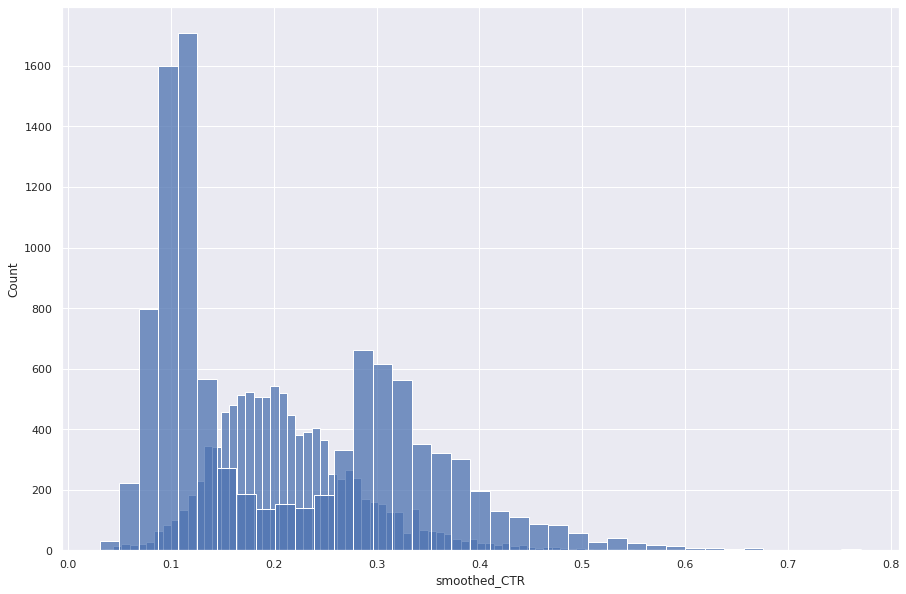

In [20]:
sns.histplot(df_control['smoothed_CTR'])
sns.histplot(df_target['smoothed_CTR'])
# –õ–∏–Ω–∏–∏ –±–æ–ª–µ–µ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–µ, –Ω–æ –≤ —Ü–µ–ª–æ–º —Ç–∞–∫–∂–µ –æ—á–µ–≤–∏–¥–Ω–æ —Ä–∞–∑–ª–∏—á–∏–µ.

In [27]:
# –ë—É—Å—Ç—Ä–µ–ø –ü—É–∞—Å—Å–æ–Ω–∞
def bootstrap(likes1, views1, likes2, views2, n_bootstrap=2000):
    poisson_bootstraps1 = stats.poisson(1).rvs((n_bootstrap, len(likes1))).astype(np.int64)
    poisson_bootstraps2 = stats.poisson(1).rvs((n_bootstrap, len(likes2))).astype(np.int64)
    globalCTR1 = (poisson_bootstraps1*likes1).sum(axis=1)/(poisson_bootstraps1*views1).sum(axis=1)
    globalCTR2 = (poisson_bootstraps2*likes2).sum(axis=1)/(poisson_bootstraps2*views2).sum(axis=1)
    return globalCTR1, globalCTR2

In [44]:
likes1 = df_AB[df_AB.exp_group == 1].likes.to_numpy()
views1 = df_AB[df_AB.exp_group == 1].views.to_numpy()
likes2 = df_AB[df_AB.exp_group == 2].likes.to_numpy()
views2 = df_AB[df_AB.exp_group == 2].views.to_numpy()
ctr1, ctr2 = bootstrap(likes1, views1, likes2, views2)


In [42]:
df_CTR1 = pd.DataFrame({'ctr':ctr1, 'exp_group': 1 })
df_CTR2 = pd.DataFrame({'ctr':ctr2, 'exp_group': 2 })
df_CTR = pd.concat([df_CTR1,df_CTR2])

<AxesSubplot:xlabel='ctr', ylabel='Count'>

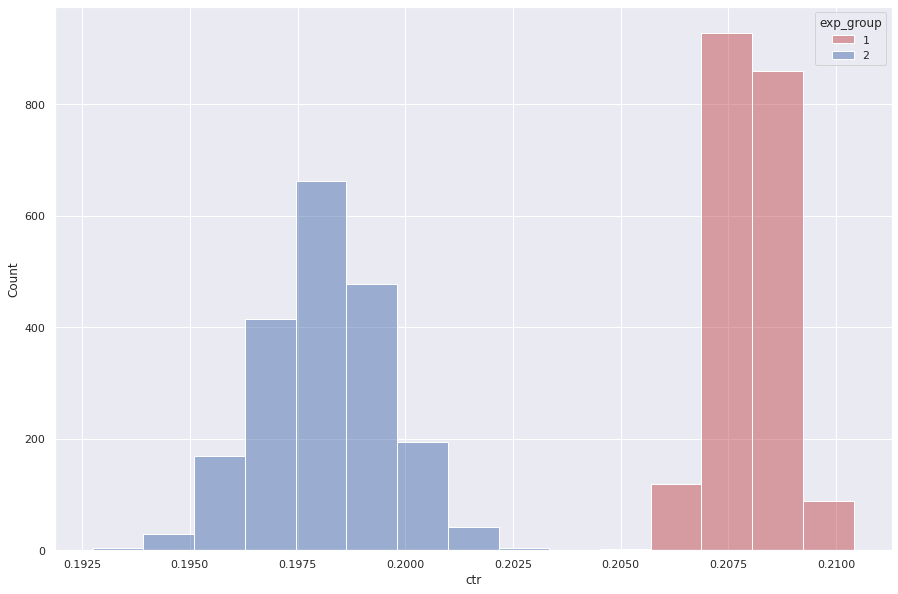

In [43]:
sns.histplot(data = df_CTR,
                        x='ctr',
                        hue='exp_group',
                        palette = ['r', 'b'],
                        kde=False)
# –ë—É—Å—Ç—Ä–µ–ø –ø–æ–∫–∞–∑–∞–ª —á–µ—Ç–∫–æ–µ –æ—Ç–ª–∏—á–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ CTR –≥—Ä—É–ø–ø 1 –∏ 2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ CTR –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø—ã –∏–º–µ–µ—Ç –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —á–µ–º —É —Ç–∞—Ä–≥–µ—Ç –≥—Ä—É–ø–ø—ã.

<AxesSubplot:ylabel='Count'>

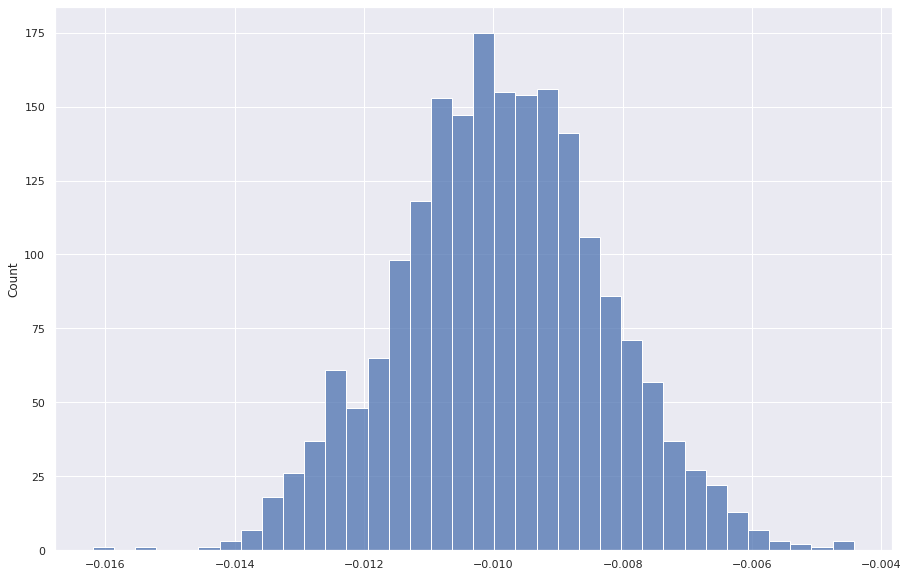

In [35]:
#–†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º–∏ –≥–ª–æ–±–∞–ª—å–Ω—ã—Ö CTR,  –º–µ–Ω—å—à–µ –Ω—É–ª—è. 
sns.histplot(ctr2 - ctr1)

In [30]:
# –ë–∞–∫–µ—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ
q = """
    SELECT exp_group, 
            bucket,
            sum(likes)/sum(views) as bucket_ctr
    FROM (SELECT exp_group,
            xxHash64(user_id)%50 as bucket,
            user_id,
            sum(action = 'like') as likes,
            sum(action = 'view') as views,
            likes/views as ctr
         FROM simulator_20220220.feed_actions
         WHERE toDate(time) >= '2022-02-13' and toDate(time) <= '2022-02-19' 
            and exp_group in (1,2)
         GROUP BY exp_group, bucket, user_id)
    GROUP BY exp_group, bucket
    """
df_bucket = pandahouse.read_clickhouse(q, connection=connection)

In [32]:
#—Ç–µ—Å—Ç –ú–∞–Ω–Ω–∞-–£–∏—Ç–Ω–∏ –≤–Ω–æ–≤—å –ø–æ–∫–∞–∑–∞–ª —Ä–∞–∑–ª–∏—á–∏—è
stats.mannwhitneyu(df_bucket[df_bucket.exp_group == 1].bucket_ctr,
                    df_bucket[df_bucket.exp_group == 2].bucket_ctr,
                    alternative = 'two-sided')


MannwhitneyuResult(statistic=1995.0, pvalue=2.859963936492646e-07)

In [33]:
stats.ttest_ind(df_bucket[df_bucket.exp_group == 1].bucket_ctr,
                df_bucket[df_bucket.exp_group == 2].bucket_ctr,
                equal_var = False)
# –¢-—Ç–µ—Å—Ç –Ω–∞–¥ –±–∞–∫–∫–µ—Ç–Ω—ã–º –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –ø–æ–∫–∞–∑–∞–ª –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ç–æ—á–Ω–æ—Å—Ç–∏ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö —Ç-—Ç–µ—Å—Ç–æ–≤!

Ttest_indResult(statistic=5.668234732053979, pvalue=3.4455951649945907e-07)

In [ ]:
''' –ò—Ç–æ–≥–æ, –º–æ–∂–Ω–æ –∑–∞–∫–ª—é—á–∏—Ç—å —á—Ç–æ –ê–í —Ç–µ—Å—Ç—ã –ø–æ–∫–∞–∑–∞–ª–∏ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏, –Ω–æ –Ω–æ–≤–æ–≤–≤–µ–¥–µ–Ω–∏–µ –Ω–µ—Ç —Å–º—ã—Å–ª–∞ –≤–≤–æ–¥–∏—Ç—å
    –Ω–∞ –≤—Å—é –≥–µ–Ω–µ—Ä–∞–ª—å–Ω—É—é —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç—å, —Ç–∞–∫ –∫–∞–∫ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–∞—è –≥—Ä—É–ø–ø–∞ –ø–æ–∫–∞–∑–∞–ª–∞ –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∏—Å–∫–æ–º–æ–π –º–µ—Ç—Ä–∏–∫–∏.'''

In [ ]:
# Task 3

In [ ]:
'''–°—á–∏—Ç–∞–µ–º –æ–±—â–∏–π CTR –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω–æ–π –≥—Ä—É–ø–ø–µ  ùê∂ùëáùëÖùëêùëúùëõùë°ùëüùëúùëô=ùë†ùë¢ùëö(ùëôùëñùëòùëíùë†)/ùë†ùë¢ùëö(ùë£ùëñùëíùë§ùë†) 
–ü–æ—Å—á–∏—Ç–∞–µ–º –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö –ø–æ—é–∑–µ—Ä–Ω—É—é –º–µ—Ç—Ä–∏–∫—É  ùëôùëñùëõùëíùëéùëüùëñùëßùëíùëë_ùëôùëñùëòùëíùë†=ùëôùëñùëòùëíùë†‚àíùê∂ùëáùëÖùëêùëúùëõùë°ùëüùëúùëô‚àóùë£ùëñùëíùë§ùë† 
–ü–æ—Å–ª–µ —á–µ–≥–æ —Å—Ä–∞–≤–Ω–∏–º  t-—Ç–µ—Å—Ç–æ–º –æ—Ç–ª–∏—á–∏—è –≤ –≥—Ä—É–ø–ø–∞—Ö –ø–æ –º–µ—Ç—Ä–∏–∫–µ ùëôùëñùëõùëíùëéùëüùëñùëßùëíùëë_ùëôùëñùëòùëíùë†  
'''

In [65]:
CTRcontrol1 = df_control.likes.sum()/ df_control.views.sum()
CTRcontrol2 = df_target.likes.sum()/ df_target.views.sum()

In [66]:
CTRcontrol1

0.20802680490126244

In [67]:
def linearized_likes(likes, CTRcontrol, views):
    linearized_like = likes-CTRcontrol*views
    return linearized_like

In [68]:
df_control['linearized_likes'] = df_control.apply(lambda x: linearized_likes(x.likes, CTRcontrol1, x.views), axis = 1)
df_target['linearized_likes'] = df_target.apply(lambda x: linearized_likes(x.likes, CTRcontrol2, x.views), axis = 1)

In [69]:
df_total = pd.concat([df_control,df_target])

In [71]:
stats.ttest_ind(df_control['linearized_likes'], df_target['linearized_likes'], equal_var = False)

Ttest_indResult(statistic=-7.202349598490507e-15, pvalue=0.9999999999999942)

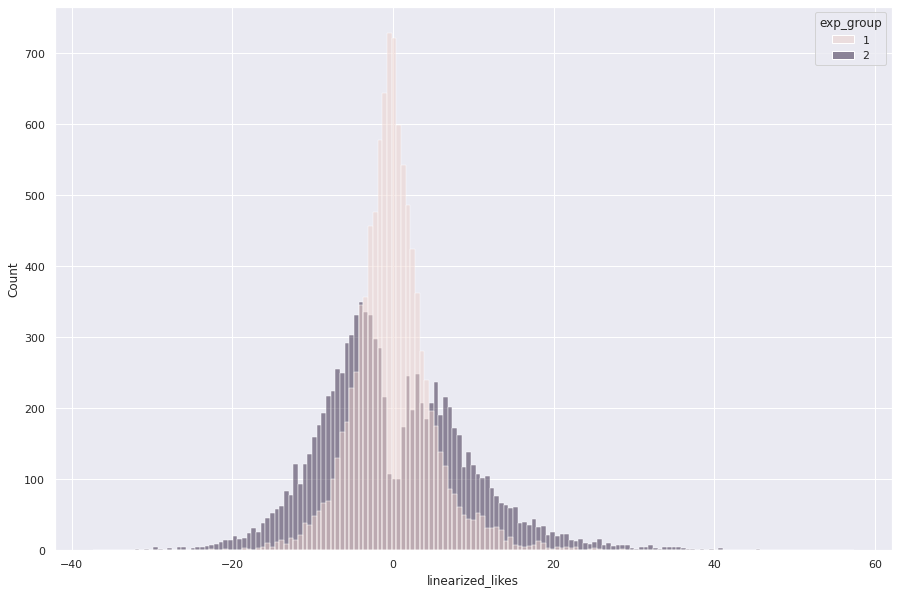

In [72]:
sns.histplot(data = df_total, x = 'linearized_likes', hue = 'exp_group')
sns.set()

In [ ]:
# –°—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 1 –∏ 2 –æ—á–µ–≤–∏–¥–Ω—ã, –Ω–æ –ø–æ –º–µ—Ç—Ä–∏–∫–µ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤ –¢-—Ç–µ—Å—Ç –Ω–µ –Ω–∞—à–µ–ª —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π.

In [73]:
# –ü—Ä–æ–≤–µ—Ä–∏–º –≥—Ä—É–ø–ø—ã 0 –∏ 3
q = '''
      Select 
          exp_group,
          user_id,
          countIf(user_id, action = 'like') as likes,
          countIf(user_id, action = 'view') as views,
          likes/views as CTR
      from simulator_20220220.feed_actions
      where toDate(time) >= '2022-02-13' and toDate(time) <= '2022-02-19' 
          and exp_group in (0,3)
      group by exp_group, user_id
     '''

df_AB = pandahouse.read_clickhouse(q, connection = connection)

In [74]:
df_control = df_AB[df_AB.exp_group == 0].copy()
df_target = df_AB[df_AB.exp_group == 3].copy()

In [81]:
stats.ttest_ind(df_control['CTR'], df_target['CTR'], equal_var = False)
# –¢-—Ç–µ—Å—Ç –∑–∞–º–µ—Ç–∏–ª –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ –º–µ–∂–¥—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è–º–∏ CTR –≥—Ä—É–ø–ø 0 –∏ 3  

Ttest_indResult(statistic=-13.896870721904069, pvalue=1.055849414662529e-43)

<AxesSubplot:xlabel='CTR', ylabel='Count'>

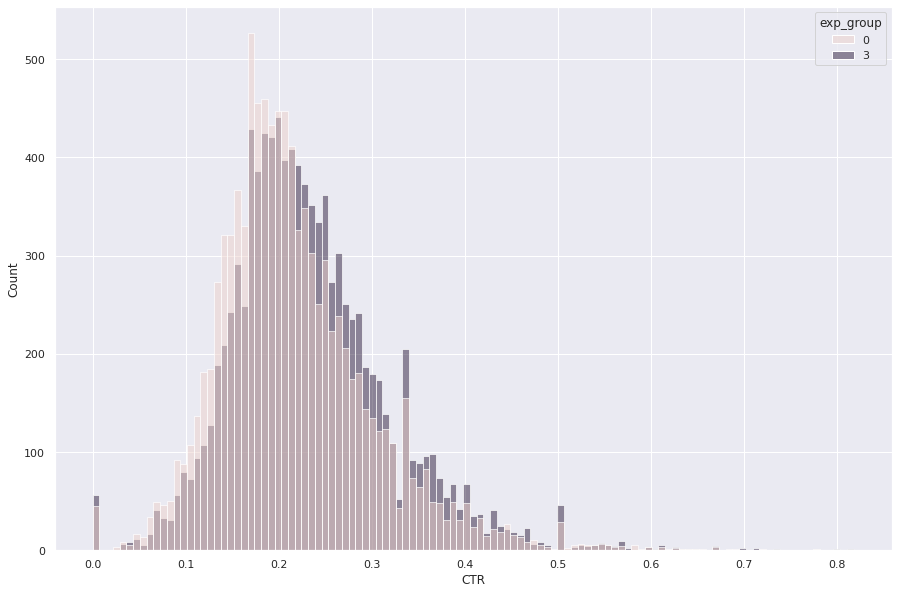

In [80]:
sns.histplot(data = df_AB, x = 'CTR', hue = 'exp_group')

In [75]:
CTRcontrol0 = df_control.likes.sum()/ df_control.views.sum()
CTRcontrol3 = df_target.likes.sum()/ df_target.views.sum()

In [76]:
df_control['linearized_likes'] = df_control.apply(lambda x: linearized_likes(x.likes, CTRcontrol0, x.views), axis = 1)
df_target['linearized_likes'] = df_target.apply(lambda x: linearized_likes(x.likes, CTRcontrol3, x.views), axis = 1)

In [77]:
df_total = pd.concat([df_control,df_target])

In [78]:
stats.ttest_ind(df_control['linearized_likes'], df_target['linearized_likes'], equal_var = False)

Ttest_indResult(statistic=-1.5428524700480617e-15, pvalue=0.9999999999999988)

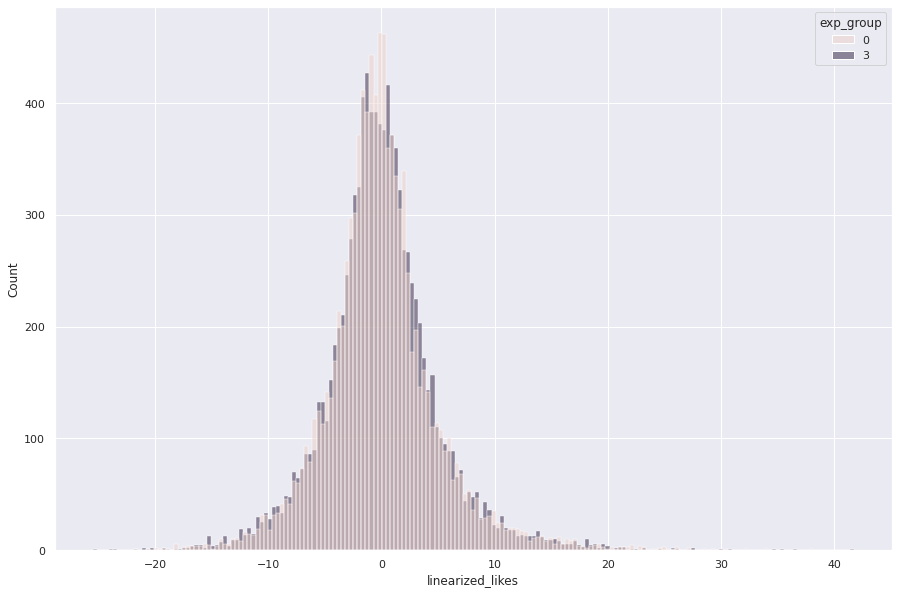

In [79]:
sns.histplot(data = df_total, x = 'linearized_likes', hue = 'exp_group')
sns.set()

In [ ]:
# –†–∞–∑–ª–∏—á–∏—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ 0 –∏ 3 –Ω–µ–æ—á–µ–≤–∏–¥–Ω—ã, –ø–æ –º–µ—Ç—Ä–∏–∫–µ –ª–∏–Ω–µ–∞—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ª–∞–π–∫–æ–≤ –¢-—Ç–µ—Å—Ç –Ω–µ –Ω–∞—à–µ–ª —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π.